In [ ]:

import os

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

cat_path= os.path.join('/content/cat_gray.jpg')
dog_path = os.path.join('/content/dog_gray.jpg')


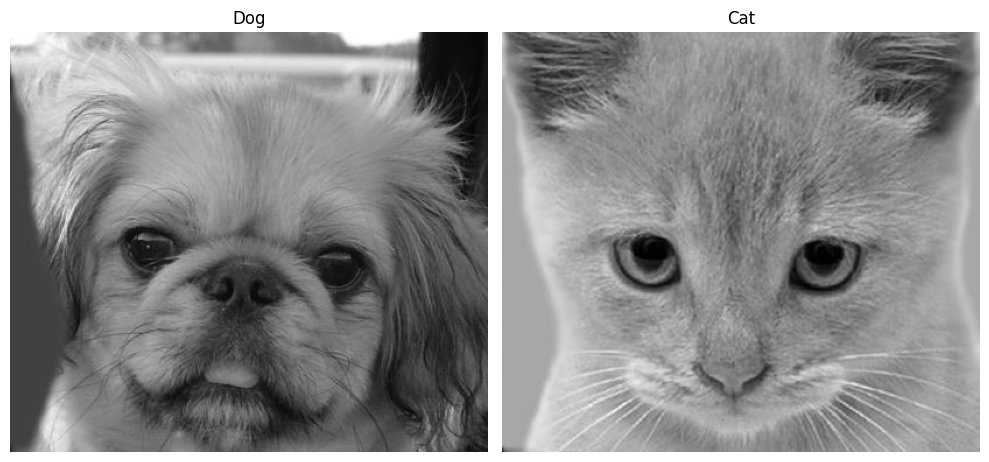

In [ ]:
cat= Image.open(cat_path).convert('L')
dog = Image.open(dog_path).convert('L')

cat_np = np.array(cat, dtype=np.float32) / 255.0
dog_np = np.array(dog, dtype=np.float32) / 255.0

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(dog_np, cmap='gray')
plt.title("Dog")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cat_np, cmap='gray')
plt.title("Cat")
plt.axis('off')
plt.tight_layout()
plt.show()

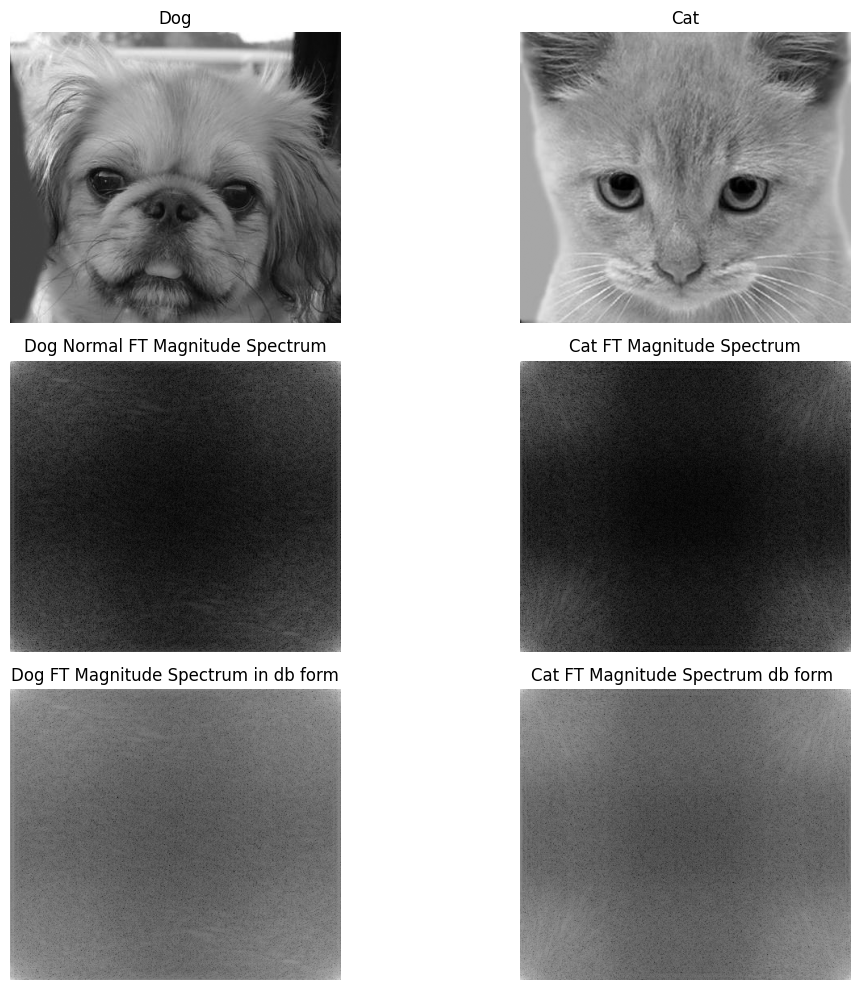

In [ ]:
#2D FT
dog_ft = np.fft.fft2(dog_np)
cat_ft = np.fft.fft2(cat_np)


#magnitude of the 2D FT
dogM = np.abs(dog_ft)
catM = np.abs(cat_ft)

#dB form

dogM_db = 20 * np.log10(dogM )
catM_db = 20 * np.log10(catM )


#ploting the magnitutude spectra in normal and db form
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.imshow(dog_np, cmap='gray')
plt.title("Dog")
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(cat_np, cmap='gray')
plt.title("Cat")
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(np.log( 1 + dogM), cmap='gray')
plt.title("Dog Normal FT Magnitude Spectrum")
plt.axis('off')


plt.subplot(3, 2, 5)
plt.imshow(dogM_db, cmap='gray')
plt.title("Dog FT Magnitude Spectrum in db form")
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(np.log(1 + catM), cmap='gray')
plt.title("Cat FT Magnitude Spectrum")
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(catM_db, cmap='gray')
plt.title("Cat FT Magnitude Spectrum db form ")
plt.axis('off')

plt.tight_layout()
plt.show()




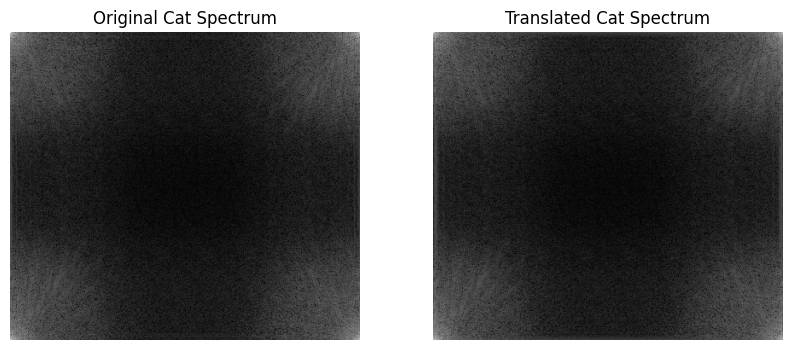

In [ ]:
translated_cat = shift(cat_np, shift=[0, 50], mode='nearest')
translated_cat_ft = np.fft.fft2(translated_cat)
translated_cat_mag = np.abs(translated_cat_ft)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(np.log(1 + np.abs(cat_ft)), cmap='gray')
plt.title("Original Cat Spectrum")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.log(1 + np.abs(translated_cat_ft)), cmap='gray')
plt.title("Translated Cat Spectrum")
plt.axis('off')
plt.show()

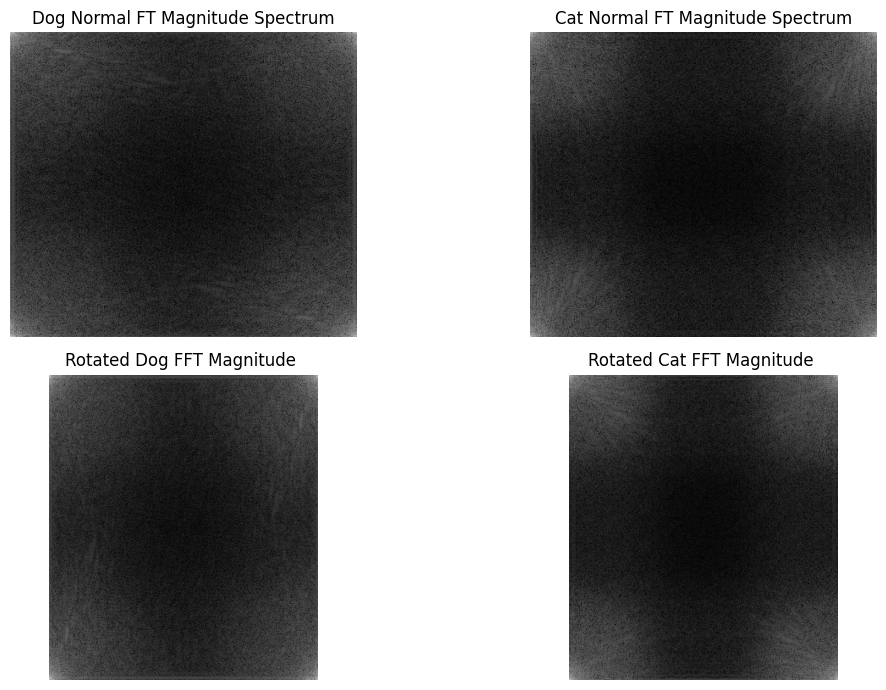

In [ ]:
#SHIFTING LF TO CENTER
dogM_shift = np.fft.fftshift(dogM)
catM_shift = np.fft.fftshift(catM)

#ROTATING 90
rotated_cat = cat.rotate(90, expand=True)
rotated_dog = dog.rotate(90, expand=True)


rotated_cat_np = np.array(rotated_cat, dtype=np.float32) / 255.0
rotated_cat_ft = np.fft.fft2(rotated_cat_np)
rotated_catM = np.abs(rotated_cat_ft)


rotated_dog_np = np.array(rotated_dog, dtype=np.float32) / 255.0
rotated_dog_ft = np.fft.fft2(rotated_dog_np)
rotated_dogM = np.abs(rotated_dog_ft)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.imshow(np.log( 1 + dogM), cmap='gray')
plt.title("Dog Normal FT Magnitude Spectrum")
plt.axis('off')


plt.subplot(2, 2, 2)
plt.imshow(np.log( 1 + catM), cmap='gray')
plt.title("Cat Normal FT Magnitude Spectrum")
plt.axis('off')


plt.subplot(2, 2, 3)
plt.imshow(np.log(1 + rotated_dogM), cmap='gray')
plt.title("Rotated Dog FFT Magnitude ")
plt.axis('off')


plt.subplot(2, 2, 4)
plt.imshow(np.log(1+rotated_catM), cmap='gray')
plt.title("Rotated Cat FFT Magnitude ")
plt.axis('off')


plt.tight_layout()
plt.show()



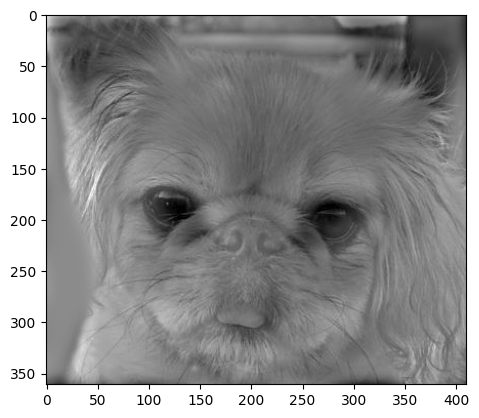

In [ ]:
#THE FINAL RESULT OF FUSING 2 IMAGES
dog_ft_shift = np.fft.fftshift(dog_ft)
cat_ft_shift = np.fft.fftshift(cat_ft)

rows, cols = cat_np.shape
crow, ccol = rows // 2, cols // 2
Y, X = np.ogrid[:rows, :cols]
dist_sq = (X - ccol)**2 + (Y - crow)**2

sigma = 9
gaussian_lp = np.exp(-dist_sq / (2 * sigma**2))
gaussian_hp = 1 - gaussian_lp

cat_ft_lp = cat_ft_shift * gaussian_lp
dog_ft_hp = dog_ft_shift * gaussian_hp

result_ft_shift = cat_ft_lp + dog_ft_hp
result_ft = np.fft.ifftshift(result_ft_shift)
result = np.fft.ifft2(result_ft)
result = np.abs(result)

result = (result - result.min()) / (result.max() - result.min())
plt.imshow(result, cmap='gray')